In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df=pd.read_csv("Fraud_detection.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14246 entries, 0 to 14245
Data columns (total 11 columns):
step              14246 non-null int64
type              14246 non-null object
amount            14246 non-null float64
nameOrig          14246 non-null object
oldbalanceOrg     14246 non-null float64
newbalanceOrig    14246 non-null float64
nameDest          14246 non-null object
oldbalanceDest    14246 non-null float64
newbalanceDest    14246 non-null float64
isFraud           14246 non-null float64
isFlaggedFraud    14246 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.3+ MB


In [7]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0.0,0.0


In [8]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.040961,-0.065173,-0.065322,-0.005285,0.033043,-0.024286,NaN
amount,0.040961,1.000000,0.092782,0.062145,0.362895,0.459616,0.133739,NaN
oldbalanceOrg,-0.065173,0.092782,1.000000,0.996683,0.196803,0.148137,-0.005359,NaN
newbalanceOrig,-0.065322,0.062145,0.996683,1.000000,0.203862,0.150776,-0.027849,NaN
oldbalanceDest,-0.005285,0.362895,0.196803,0.203862,1.000000,0.908342,-0.018103,NaN
newbalanceDest,0.033043,0.459616,0.148137,0.150776,0.908342,1.000000,-0.009828,NaN
isFraud,-0.024286,0.133739,-0.005359,-0.027849,-0.018103,-0.009828,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_new=df.drop(["nameOrig","nameDest"],axis=1)

In [10]:
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0.0,0.0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.00,0.00,0.0,0.0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.00,0.00,0.0,0.0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.00,0.00,0.0,0.0
8,1,PAYMENT,4024.36,2671.00,0.00,0.00,0.00,0.0,0.0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.00,40348.79,0.0,0.0


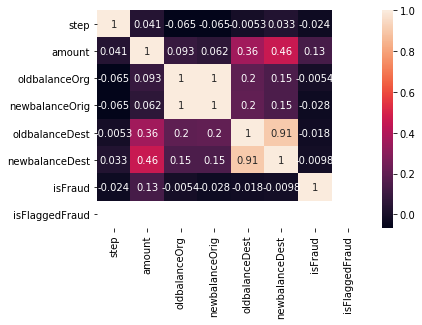

In [11]:
sns.heatmap(df_new.corr(),annot=True)

In [12]:
df_new.drop(['isFlaggedFraud'],inplace=True,axis=1)

In [13]:
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0.0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0.0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1.0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1.0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0.0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.00,0.00,0.0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.00,0.00,0.0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.00,0.00,0.0
8,1,PAYMENT,4024.36,2671.00,0.00,0.00,0.00,0.0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.00,40348.79,0.0


In [14]:
from sklearn import preprocessing

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14246 entries, 0 to 14245
Data columns (total 8 columns):
step              14246 non-null int64
type              14246 non-null object
amount            14246 non-null float64
oldbalanceOrg     14246 non-null float64
newbalanceOrig    14246 non-null float64
oldbalanceDest    14246 non-null float64
newbalanceDest    14246 non-null float64
isFraud           14246 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1001.7+ KB


In [16]:
df_new.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.040961,-0.065173,-0.065322,-0.005285,0.033043,-0.024286
amount,0.040961,1.000000,0.092782,0.062145,0.362895,0.459616,0.133739
oldbalanceOrg,-0.065173,0.092782,1.000000,0.996683,0.196803,0.148137,-0.005359
newbalanceOrig,-0.065322,0.062145,0.996683,1.000000,0.203862,0.150776,-0.027849
oldbalanceDest,-0.005285,0.362895,0.196803,0.203862,1.000000,0.908342,-0.018103
newbalanceDest,0.033043,0.459616,0.148137,0.150776,0.908342,1.000000,-0.009828
isFraud,-0.024286,0.133739,-0.005359,-0.027849,-0.018103,-0.009828,1.000000


In [17]:
df_new.drop(['newbalanceDest','oldbalanceOrg'],inplace=True,axis=1)

In [18]:
df_new.tail()

,step,type,amount,newbalanceOrig,oldbalanceDest,isFraud
14241,8,PAYMENT,35108.12,0.00,0.0,0.0
14242,8,PAYMENT,20924.47,0.00,0.0,0.0
14243,8,CASH_OUT,75244.54,0.00,167.0,0.0
14244,8,PAYMENT,3074.36,7167.64,0.0,0.0
14245,8,PAYMENT,11465.21,0.00,0.0,0.0


In [19]:
df_new.describe()

,step,amount,newbalanceOrig,oldbalanceDest,isFraud
count,14246.000000,1.424600e+04,1.424600e+04,1.424600e+04,14246.000000
mean,5.036923,1.118877e+05,8.107136e+05,8.411336e+05,0.005475
std,2.463073,2.805248e+05,2.059984e+06,2.528174e+06,0.073794
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.584905e+03,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.286530e+04,8.216325e+03,0.000000e+00,0.000000
75%,7.000000,1.218946e+05,1.294173e+05,2.641427e+05,0.000000
max,8.000000,1.000000e+07,1.301050e+07,2.093759e+07,1.000000


In [20]:
Y=df_new["isFraud"]

In [21]:
Y

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
14216    0.0
14217    0.0
14218    0.0
14219    0.0
14220    0.0
14221    0.0
14222    0.0
14223    0.0
14224    0.0
14225    0.0
14226    0.0
14227    0.0
14228    0.0
14229    0.0
14230    0.0
14231    0.0
14232    0.0
14233    0.0
14234    0.0
14235    0.0
14236    0.0
14237    0.0
14238    0.0
14239    0.0
14240    0.0
14241    0.0
14242    0.0
14243    0.0
14244    0.0
14245    0.0
Name: isFraud, Length: 14246, dtype: float64

In [22]:
DF=df_new.replace("PAYMENT",0)
DF1=DF.replace("CASH_IN",1)
df=DF1.replace("CASH_OUT",2)
df1_new=df.replace("TRANSFER",3)
df2_new=df1_new.replace("PAYMENT",4)
df_new=df2_new.replace("DEBIT",5)

In [23]:
df_new.head()

,step,type,amount,newbalanceOrig,oldbalanceDest,isFraud
0,1,0,9839.64,160296.36,0.0,0.0
1,1,0,1864.28,19384.72,0.0,0.0
2,1,3,181.00,0.00,0.0,1.0
3,1,2,181.00,0.00,21182.0,1.0
4,1,0,11668.14,29885.86,0.0,0.0


In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14246 entries, 0 to 14245
Data columns (total 6 columns):
step              14246 non-null int64
type              14246 non-null int64
amount            14246 non-null float64
newbalanceOrig    14246 non-null float64
oldbalanceDest    14246 non-null float64
isFraud           14246 non-null float64
dtypes: float64(4), int64(2)
memory usage: 779.1 KB


In [27]:
X=df_new.drop(["isFraud"],axis=1)

In [28]:
X

,step,type,amount,newbalanceOrig,oldbalanceDest
0,1,0,9839.64,160296.36,0.00
1,1,0,1864.28,19384.72,0.00
2,1,3,181.00,0.00,0.00
3,1,2,181.00,0.00,21182.00
4,1,0,11668.14,29885.86,0.00
5,1,0,7817.71,46042.29,0.00
6,1,0,7107.77,176087.23,0.00
7,1,0,7861.64,168225.59,0.00
8,1,0,4024.36,0.00,0.00
9,1,5,5337.77,36382.23,41898.00


In [29]:
#plt.figure(figsize=(10,8))
#bx =sns.boxplot(x= "amount",data = X)
#bx.set_title("Boxplot")
#plt.show()

In [30]:
#fig,ax=plt.subplots()
#ax.violinplot(X["step"],vert=False)
#plt.show()

In [ ]:
sns.set_style("darkgrid")
sns.countplot(x = 'isFraud' , hue= 'step' , data = X)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)
#numpy.set_printoptions(precision=3) #Setting precision for the output
rescaledX

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.00000000e+00, 0.00000000e+00, 9.83725235e-04, 1.23205354e-02,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.86189044e-04, 1.48992859e-03,
        0.00000000e+00],
       [0.00000000e+00, 6.00000000e-01, 1.78610043e-05, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [1.00000000e+00, 4.00000000e-01, 7.52421680e-03, 0.00000000e+00,
        7.97608607e-06],
       [1.00000000e+00, 0.00000000e+00, 3.07197073e-04, 5.50911838e-04,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.14628227e-03, 0.00000000e+00,
        0.00000000e+00]])

In [33]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [35]:
logit=linear_model.LogisticRegression(C=1e10,max_iter=1e5)
logit.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100000.0,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [36]:
logit.score(X_test,Y_test)

0.9940350877192983

In [37]:
logit.score(X_train,Y_train)

0.9946472446472446

In [38]:
predictions = logit.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,predictions))

[[2833    0]
 [  17    0]]


# PAIRPLOTS

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


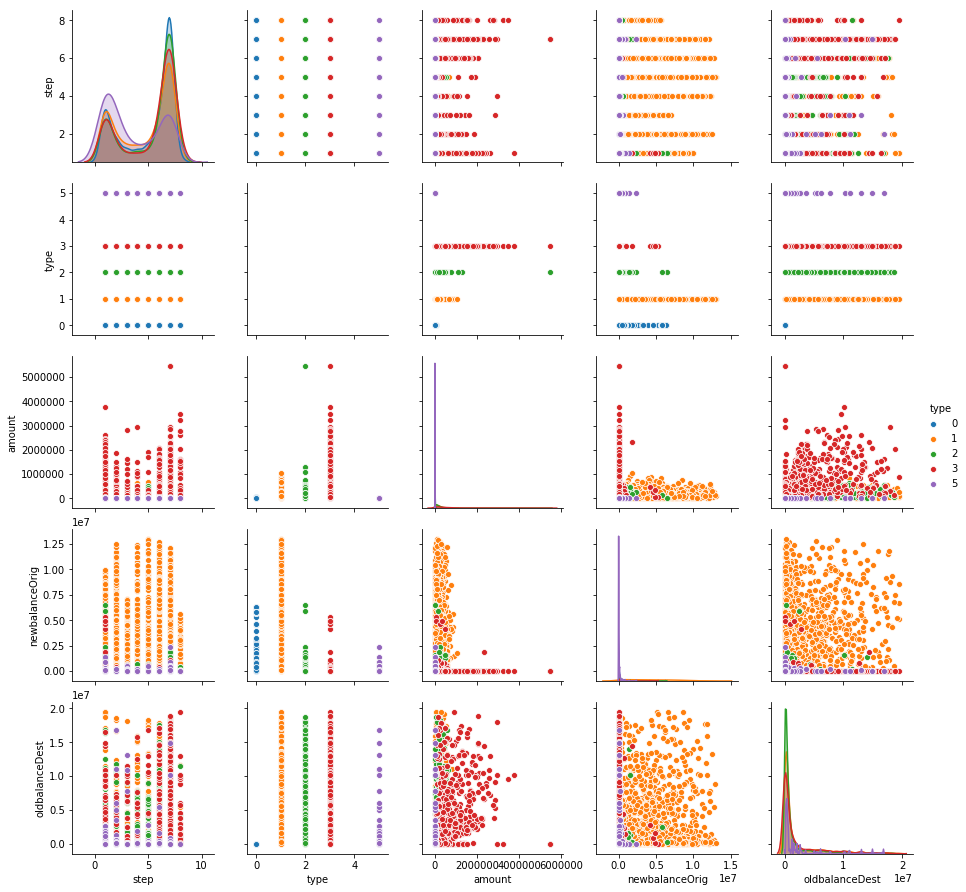

In [40]:
sns.pairplot(X_train[["step","type","amount","newbalanceOrig","oldbalanceDest"]],diag_kind='kde',hue='type')

In [ ]:
logit.predict([[]])

In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2833
         1.0       0.00      0.00      0.00        17

   micro avg       0.99      0.99      0.99      2850
   macro avg       0.50      0.50      0.50      2850
weighted avg       0.99      0.99      0.99      2850



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
